(345057527, 2125132863, 0)
(345057527, 2120986938, 0)
(426691834, 3822987058, 0)
(426691834, 1072275362, 0)
(426691834, 10892640497, 0)
(426740913, 630735062, 0)
(426741631, 7544804264, 0)
(426741631, 7544804238, 0)
(455965563, 1073127116, 0)
(556655324, 1138644733, 0)
(556655324, 1138644887, 0)
(556655324, 559382074, 0)
(556655631, 1073124854, 0)
(556655631, 1065436943, 0)
(556655631, 1367957042, 0)
(556655640, 1367956014, 0)
(556655640, 1367959222, 0)
(556655640, 1367953515, 0)
(556655640, 1065436943, 0)
(556655681, 556655708, 0)
(556655681, 630734844, 0)
(556655681, 1367953515, 0)
(556655708, 556655763, 0)
(556655708, 556655681, 0)
(556655708, 4862634092, 0)
(556655763, 556655708, 0)
(556655763, 2454013465, 0)
(559382064, 559382070, 0)
(559382064, 641633347, 0)
(559382070, 559382074, 0)
(559382070, 559382064, 0)
(559382074, 559382070, 0)
(559382074, 556655324, 0)
(559387916, 559387926, 0)
(559387916, 2398048095, 0)
(559387916, 1362852611, 0)
(559387926, 559387947, 0)
(559387926, 559

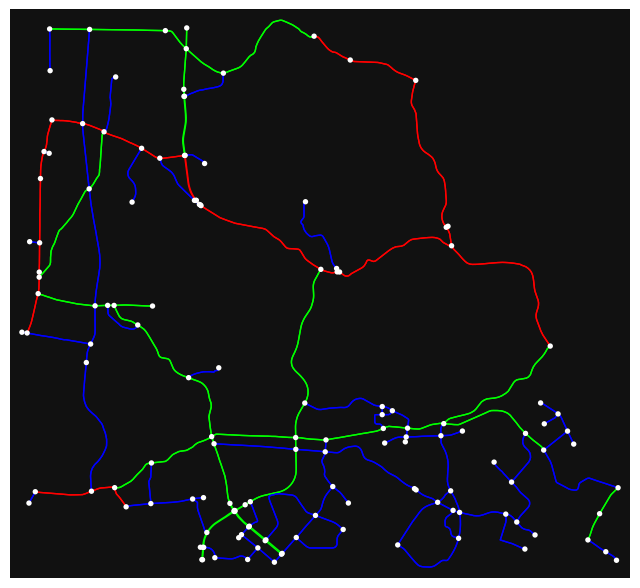

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [46]:
import osmnx as ox
import folium

# 峠道
graph = ox.graph_from_point(center_point=(35.334446, 136.990590)
                                , network_type='drive'
                                , dist=1000
                                , simplify=True
                                , custom_filter='["highway"~"tertiary|secondary|primary"]')

# グラフデータをGeoDataFrameに変換
gdf_nodes = ox.graph_to_gdfs(graph, nodes=True, edges=False)
gdf_edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

# target_edges = gdf_edges[gdf_edges["highway"].isin(["primary", "tertiary", "secondary", "secondary_link"])]
# target_nodes = gdf_nodes[gdf_nodes["highway"].isin(["primary", "tertiary", "secondary", "secondary_link"])]

for index, edge in gdf_edges.iterrows():
  # ジオメトリ内のノードを抽出
  nodes_in_geometry = list(edge.geometry.coords)
  print(index)
  # # ループの処理
  # print("start:", edge.name[0])
  # for node in nodes_in_geometry:
  #   print(node[0])
  #   print(node[1])
  # print("end:", edge.name[1])
      
print(len(gdf_edges))
print(len(gdf_nodes))

G = ox.graph_from_gdfs(gdf_nodes, gdf_edges)
edge_color = []
for u, v, k, data in G.edges(keys=True, data=True):
    if 'highway' in data:
        if data['highway'] == 'primary':
            edge_color.append('#FF0000')  # 赤色
        elif data['highway'] == 'secondary':
            edge_color.append('#00FF00')  # 緑色
        else:
            edge_color.append('#0000FF')  # 青色
    else:
        edge_color.append('#000000')  # 黒色

ox.plot_graph(G, edge_color=edge_color)